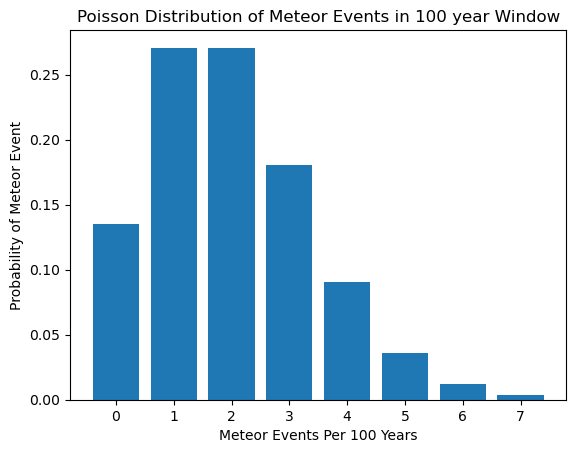

the probability no cars will show up 0.14
the probability 3 or more cars show up 0.32
drive through gets at least 1 car 0.86
What grade point average is required to be in the top 5% of the graduating class?
3.49
What GPA constitutes the bottom 15% of the class?
2.69
Would a student with a 2.8 grade point average qualify
2.87
3.13
<class 'scipy.stats._distn_infrastructure.rv_continuous_frozen'>
# What is the probability that at least one of your first 60 answers is correct?
0.37
nan
nan


0.0

In [27]:
# A bank found that the average number of cars waiting during the 
# noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions concerning the probability 
# of cars waiting at the drive-up window.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

mean = 2

meteors = stats.poisson(mean)
meteors


x = np.arange(0,8)
y = [meteors.pmf(i) for i in x]

plt.bar(x,y)

plt.xlabel('Meteor Events Per 100 Years')
plt.ylabel('Probability of Meteor Event')
plt.title('Poisson Distribution of Meteor Events in 100 year Window')
plt.show()


# What is the probability that no cars drive up in the noon hour?
print('the probability no cars will show up', round(meteors.pmf(0),2))




# What is the probability that 3 or more cars come through the drive through?
print('the probability 3 or more cars show up', round(meteors.sf(2),2))




# How likely is it that the drive through gets at least 1 car?
print('drive through gets at least 1 car', round(meteors.sf(0),2))



# Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:
test_numbers = stats.norm(3, .3)



# What grade point average is required to be in the top 5% of the graduating class?
print('What grade point average is required to be in the top 5% of the graduating class?')
print(round(test_numbers.isf(.05),2))


# What GPA constitutes the bottom 15% of the class?
print('What GPA constitutes the bottom 15% of the class?')
print(round(test_numbers.isf(.85),2))


# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify 
# for this scholarship?
print('Would a student with a 2.8 grade point average qualify')
# for this scholarship?')
print(round(test_numbers.isf(2/3),2))
#yes because they are in the lower third of the class 

# If I have a GPA of 3.5, what percentile am I in?
print(round(test_numbers.isf(1/3),2))
#the upper third percentile




# A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors 
# and 97 click-throughs. How likely is it that this many people or more click through?
the_test = stats.norm(4326, .98)
round(the_test.isf(.98),2)
print(type(the_test))





# You are working on some statistics homework consisting of 100 questions where all 
# of the answers are a probability rounded to the hundreths place. Looking to save time, 
# you put down random probabilities as the answer to each question.

# What is the probability that at least one of your first 60 answers is correct?


# random probabilities

print('# What is the probability that at least one of your first 60 answers is correct?')
the_test = stats.poisson(1)
print(round(the_test.cdf(.6),2))





# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? How likely is it that it goes 
# two days without getting cleaned up? All week?

students = (22 * 3) * .9
## 3% chance cleaned up
## 90% students visit per day
## 22 students
## check each day, week
the_test= stats.binom(students, .03)
print(the_test.pmf(1))
print(the_test.pmf(2))




# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 

# After several weeks of careful observation, you notice that the average number of people in line 
# when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go 
# back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

mean = 15
sd = 3

# 2 mins each person
# 10 minutes from ordering to get food
# at least 15 minutes left 
# one hour total time

people_time = stats.norm(mean, sd)
the_test = pd.Series(people_time.rvs(10))

the_test = the_data*2

the_test = the_test + 10

(the_test + 15 <= 60).mean()




In [11]:
from env import username, hostname, password
import pandas as pd
import numpy as np
from pydataset import data


# Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. For the following questions, 
# calculate the answer based on modeling the employees salaries with a normal distribution 
# defined by the calculated mean and standard deviation then compare this answer to the actual 
# values present in the salaries dataset.

def get_db_url(username, hostname, password, db_name):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

db_name = 'employees'

url = get_db_url(username, hostname, password, db_name)
query = '''
select employees.emp_no, salaries.to_date, salaries.salary from employees
join salaries using(emp_no)
;
'''
employees = pd.read_sql(query, url)

employees

,emp_no,to_date,salary
0,10001,1987-06-26,60117
1,10001,1988-06-25,62102
2,10001,1989-06-25,66074
3,10001,1990-06-25,66596
4,10001,1991-06-25,66961
...,...,...,...
2844042,499999,1998-11-30,63707
2844043,499999,1999-11-30,67043
2844044,499999,2000-11-29,70745
2844045,499999,2001-11-29,74327


In [32]:
the_largest_salary = employees.groupby(by=employees.emp_no).agg('max')
the_data = the_largest_salary.salary

new_data = stats.rv_continuous(the_data)
print(type(new_data))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:


# What percent of employees earn less than 60,000?


# What percent of employees earn more than 95,000?


# What percent of employees earn between 65,000 and 80,000?


# What do the top 5% of employees make?